## Uždavinys 1

Naudodami krūties vėžio duomenų rinkinį, prognozuokite, ar navikas yra gerybinis ar piktybinis, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt 


In [74]:
# Nuskaityti duomenis
df = pd.read_csv('data.csv')
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Pašalinam stulpelius
X.drop(columns=['Unnamed: 32', 'id'], inplace=True)


# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)

# Ivertinti modelio tiksluma
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [84]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)

# print(X_train)
# print('-------------')
# print(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9649122807017544


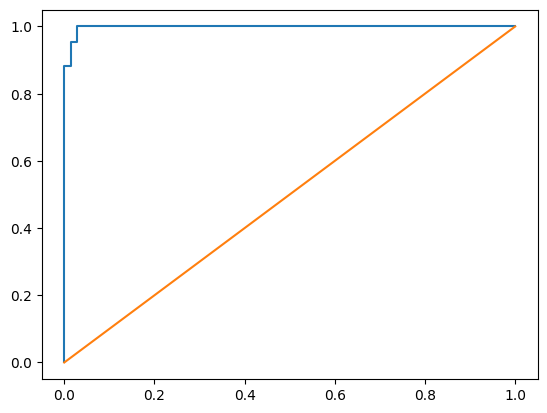

In [41]:
# ROC kreive
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

In [50]:
import warnings
# prognozuoti konkretu atveji
prediction = model.predict(X.iloc[4].values.reshape(1, -1))
# print(X.iloc[4].values)
print(prediction)

def predict_cancer(x):
    warnings.filterwarnings("ignore", message="X does not have valid feature names")
    prediction = model.predict([x])
    result = 'Piktybinis' if prediction[0] == 1 else 'Gerybinis'
    print(result); return result
predict_cancer(X_test.iloc[1].values)

[1]
Piktybinis


c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Piktybinis'

## Uždavinys 2

Naudojant širdies ligų duomenų rinkinį, prognozuokite, ar pacientas turi širdies ligą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys https://archive.ics.uci.edu/dataset/45/heart+disease


In [98]:
df = pd.read_csv('reprocessed_hungarian_data.csv', sep=' ')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df.dropna(inplace=True)

X = df.drop('num', axis=1)
y = df['num']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

0.6216216216216216
[[42  2  1  0  0]
 [ 5  2  0  4  0]
 [ 1  1  1  3  3]
 [ 1  1  1  1  0]
 [ 2  0  1  2  0]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        45
           1       0.33      0.18      0.24        11
           2       0.25      0.11      0.15         9
           3       0.10      0.25      0.14         4
           4       0.00      0.00      0.00         5

    accuracy                           0.62        74
   macro avg       0.30      0.30      0.28        74
weighted avg       0.59      0.62      0.59        74



c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)

# print(X_train)
# print('-------------')
# print(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.581081081081081


## Uždavinys 3

Naudojant Pima Indians Diabetes duomenų rinkinį, prognozuokite, ar pacientas turi diabetą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: Pima Indians Diabetes Database https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

In [103]:
df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

0.7760416666666666
[[111  17]
 [ 26  38]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       128
           1       0.69      0.59      0.64        64

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [105]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)

# print(X_train)
# print('-------------')
# print(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.828125


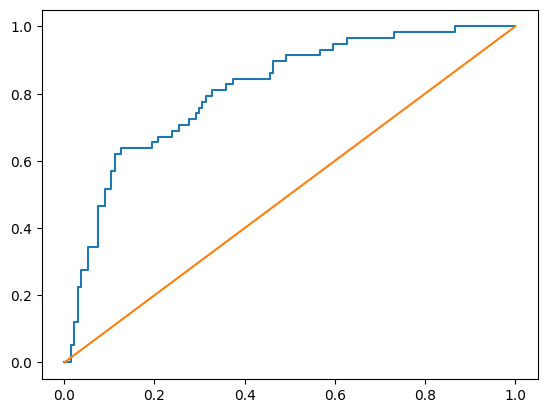

In [11]:
# ROC kreive
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

## Uždavinys 4

Naudojant kraujo donorystės duomenų rinkinį, prognozuokite, ar donoras atliks kraujo donorystę, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: [Blood Transfusion Service Center Data Set](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center)

In [85]:
df = pd.read_csv('transfusion_data.csv')
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

X = df.drop('Target', axis=1)
y = df['Target']

# Mokymo ir testavimo rinkiniai
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelis
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Gauti prognozes testavimo rinkinyje
y_pred = model.predict(X_test)

# Ivertinti modulio tiksluma
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

# Suformuoti painiavos matrica ir klasifikacijos ataskaita
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

0.7647058823529411
[[139   2]
 [ 42   4]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       141
           1       0.67      0.09      0.15        46

    accuracy                           0.76       187
   macro avg       0.72      0.54      0.51       187
weighted avg       0.74      0.76      0.69       187



In [88]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)

# print(X_train)
# print('-------------')
# print(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8021390374331551


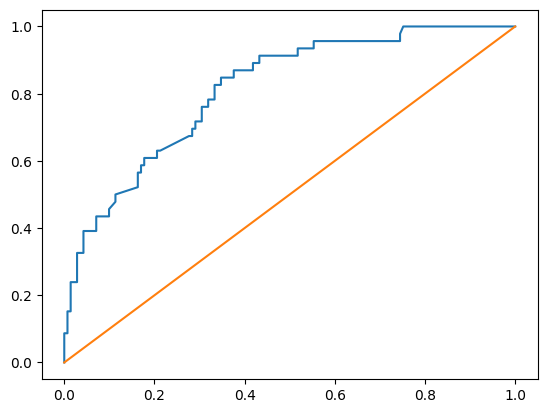

In [14]:
# ROC kreive
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

In [93]:
# 2 Uzduotys

column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('reprocessed_hungarian_data.csv', sep=' ', names= column_names)
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y.values)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_poly, y_train)
y_pred = log_reg.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

[0 1 0 3 0 0 0 0 1 0 0 3 0 3 0 0 1 0 1 1 0 0 0 3 0 0 0 0 0 0 3 0 1 3 0 0 1
 0 0 0 0 4 0 0 3 0 0 0 0 1 2 4 0 0 0 0 1 1 0 3 0 0 0 1 0 0 0 0 3 0 1 0 2 0
 2 0 2 0 0 1 0 0 1 0 2 3 3 0 2 0 0 0 0 2 0 2 0 0 0 0 4 0 2 1 1 0 0 0 0 0 0
 2 0 0 0 1 1 1 0 1 3 0 0 4 0 0 0 0 0 0 0 1 3 3 0 1 0 0 2 1 4 4 4 0 3 0 0 0
 0 2 0 0 0 0 0 4 2 0 3 0 3 4 0 0 0 0 3 4 0 0 0 0 0 0 0 4 4 3 0 0 0 1 0 3 0
 0 2 0 1 0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 2 0 0 0 2
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 4 3 2 2 0 2 3 0 1 0 2 2 2 3 4 1 0 0 3 0 0 0
 0 0 0 0 2 3 1 0 3 0 2 0 0 0 1 0 0 0 3 2 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.5945945945945946
Confusion Matrix:
[[41  4  6  1  1]
 [ 3  2  0  1  2]
 [ 3  1  1  1  2]
 [ 2  0  2  0  1]
 [ 0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        53
           1       0.29      0.25      0.27         8
           2       0.11      0.12      0.12         8
           3       0.00  

c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages